Import Required Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sn
from sklearn.model_selection import train_test_split

In [3]:
from keras.utils import plot_model

In [ ]:
# Libraries Required to plot the nueral network
# ! pip install graphviz
# ! pip install pydot

Download the MNIST Dataset (Hand Digits Recognition)

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Flattern the each image into row vector.

In [5]:
X_train_flat=X_train.reshape(len(X_train),784)
X_test_flat=X_test.reshape(len(X_test),784)


In [6]:
X_train_flat=X_train_flat/255
X_test_flat=X_test_flat/255

Creating training and validation data

In [7]:
X_train_data, X_val, y_train_data, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)


Model Creation and Display the model

In [8]:
model=keras.Sequential(
    [keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


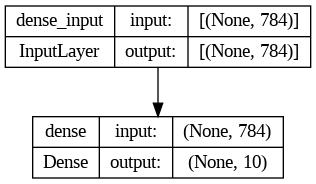

In [9]:
# Plot the model architecture to a file (e.g., "model.png")
plot_model(model, to_file="model.png", show_shapes=True)

Model Optimization

In [10]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])


Model Training

In [11]:
start_time = time.time()
history = model.fit(X_train_data, y_train_data, epochs=10, validation_data=(X_val, y_val))
end_time = time.time()
training_time = end_time - start_time
print(f"Training took {training_time:.2f} seconds")

Epoch 1/10
1500/1500 [==============================] - 10s 4ms/step - loss: 0.5034 - accuracy: 0.8682 - val_loss: 0.3302 - val_accuracy: 0.9111
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3138 - accuracy: 0.9125 - val_loss: 0.2984 - val_accuracy: 0.9159
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2901 - accuracy: 0.9195 - val_loss: 0.2879 - val_accuracy: 0.9193
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2781 - accuracy: 0.9220 - val_loss: 0.2823 - val_accuracy: 0.9206
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2703 - accuracy: 0.9244 - val_loss: 0.2834 - val_accuracy: 0.9208
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2652 - accuracy: 0.9266 - val_loss: 0.2750 - val_accuracy: 0.9227
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2610 - accuracy: 0.9280 - val_loss: 0.2737 - val_accuracy

Plot the training accuracy and validation accuracy

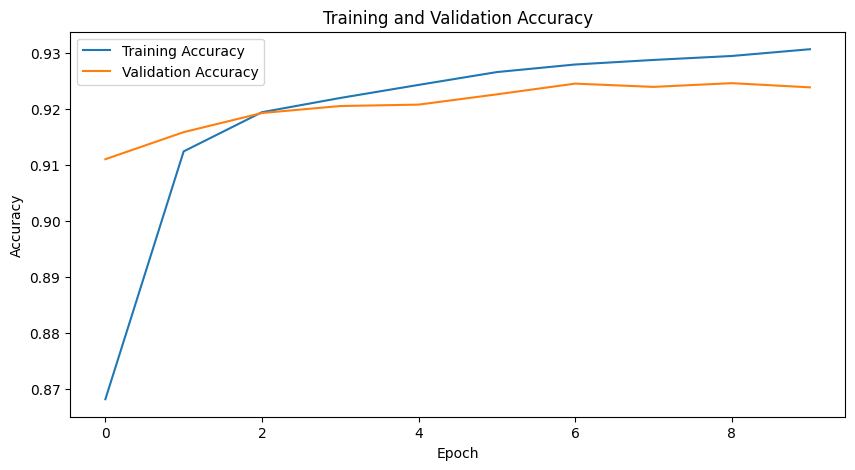

In [12]:

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Plot the training loss and validation loss

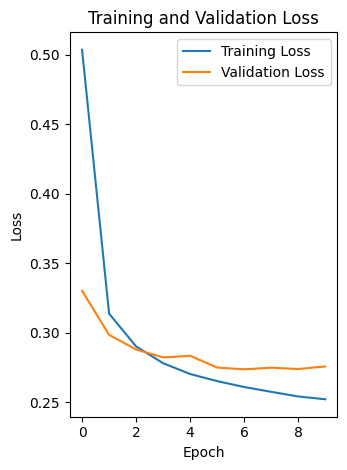

In [13]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

Model Testing

In [14]:
[test_loss,test_accuracy]=model.evaluate(X_test_flat,y_test)
test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.2703 - accuracy: 0.9229


(0.27032536268234253, 0.9229000210762024)

Confusion Matrix Creation

In [17]:
y_predicted=model.predict(X_test_flat)
y_predicted.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [18]:
y_pred_digits = np.argmax(y_predicted, axis=1)

In [19]:
y_test[20],y_pred_digits[20]

(9, 9)

In [20]:
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_digits)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    8,  927,   19,    7,    4,   12,    9,   35,    7],
       [   2,    0,   19,  924,    0,   21,    2,   10,   16,   16],
       [   1,    1,    7,    2,  896,    0,    9,    4,    8,   54],
       [   8,    3,    4,   36,    9,  784,    9,    6,   23,   10],
       [  12,    3,    8,    1,    7,   16,  909,    1,    1,    0],
       [   1,    7,   23,    8,    7,    1,    0,  932,    2,   47],
       [   6,   11,    6,   25,   10,   37,    8,   10,  837,   24],
       [  10,    7,    1,    9,   16,    6,    0,   12,    5,  943]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True Digit')

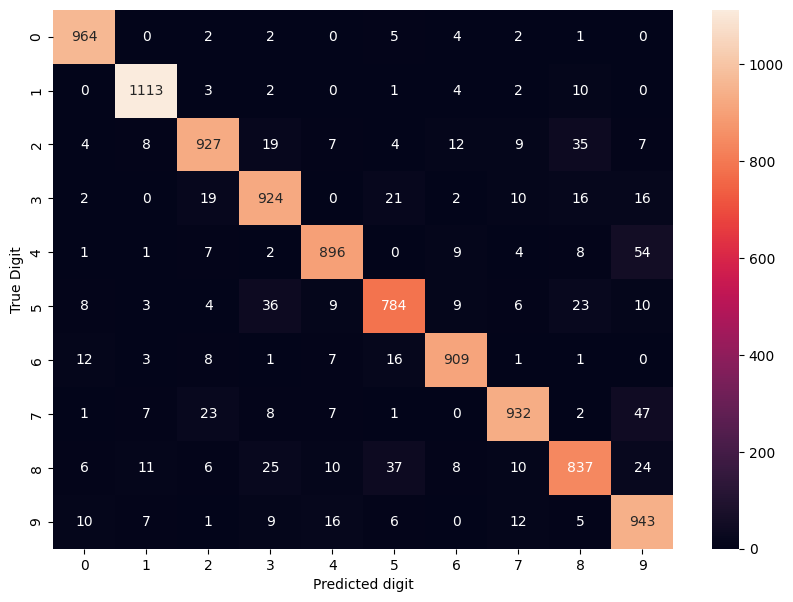

In [21]:
plt.figure(figsize=(10,7))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted digit')
plt.ylabel('True Digit')